In [4]:
# Load the dataset `cars.json` using Pandas
import pandas as pd
df = pd.read_json('data/cars.json')

# Display the first 5 rows
print(df.head())

                        Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   
3              amc rebel sst              16.0          8         304.0   
4                ford torino              17.0          8         302.0   

   Horsepower  Weight_in_lbs  Acceleration        Year Origin  
0       130.0           3504          12.0  1970-01-01    USA  
1       165.0           3693          11.5  1970-01-01    USA  
2       150.0           3436          11.0  1970-01-01    USA  
3       150.0           3433          12.0  1970-01-01    USA  
4       140.0           3449          10.5  1970-01-01    USA  


In [5]:
df.isnull().sum()

Name                 0
Miles_per_Gallon    10
Cylinders            0
Displacement         0
Horsepower           8
Weight_in_lbs        0
Acceleration         0
Year                 0
Origin               0
dtype: int64

In [6]:
df.isnull().sum()

Name                 0
Miles_per_Gallon    10
Cylinders            0
Displacement         0
Horsepower           8
Weight_in_lbs        0
Acceleration         0
Year                 0
Origin               0
dtype: int64

In [7]:
# Handle missing values:
# Replace missing `Miles_per_Gallon` with the median value.
df['Miles_per_Gallon'] = df['Miles_per_Gallon'].fillna(df['Miles_per_Gallon'].median())


In [8]:
print(df['Miles_per_Gallon'].isnull().sum())

0


In [9]:
# Replace missing `Horsepower` with the mean value.
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].mean())


In [10]:
df.duplicated().sum()

2

In [11]:
# Remove duplicate rows 
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
# Add a new column `Power-to-Weight Ratio` calculated as `Horsepower / Weight_in_lbs`
df['Power-to-Weight Ratio'] = df['Horsepower'] / df['Weight_in_lbs']
# if Power-to-Weight Ratio is NaN, replace it with 0
df['Power-to-Weight Ratio'] = df['Power-to-Weight Ratio'].fillna(0)


In [14]:
# if "Origin" is empty, replace it with "Unknown"
df['Origin'] = df['Origin'].fillna('Unknown')


In [15]:
# Print the NaN count for each column
print(df.isnull().sum())

Name                     0
Miles_per_Gallon         0
Cylinders                0
Displacement             0
Horsepower               0
Weight_in_lbs            0
Acceleration             0
Year                     0
Origin                   0
Power-to-Weight Ratio    0
dtype: int64


In [16]:
# Save the modifed dataset with no missing values and the new column added as cars_processed.csv in result directory
df.to_csv('result/cars_processed.csv', index=False)

In [17]:
# Generate descriptive statistics for the dataset (mean, median, standard deviation, etc.)
print(df.describe())

       Miles_per_Gallon   Cylinders  Displacement  Horsepower  Weight_in_lbs  \
count        408.000000  408.000000    408.000000  408.000000     408.000000   
mean          23.501961    5.468137    194.408088  105.088723    2977.063725   
std            7.719779    1.711061    104.798406   38.381148     846.311605   
min            9.000000    3.000000     68.000000   46.000000    1613.000000   
25%           17.500000    4.000000    105.000000   76.000000    2225.250000   
50%           23.000000    4.000000    148.500000   95.000000    2822.500000   
75%           29.000000    8.000000    302.000000  129.000000    3614.750000   
max           46.600000    8.000000    455.000000  230.000000    5140.000000   

       Acceleration  Power-to-Weight Ratio  
count    408.000000             408.000000  
mean      15.617157               0.035074  
std        3.142559               0.006093  
min        8.000000               0.020557  
25%       13.700000               0.031222  
50%      

In [18]:
#  Group cars by `Origin` and calculate the average `Miles_per_Gallon` for each group
print(df.groupby('Origin')['Miles_per_Gallon'].mean())

Origin
          30.000000
Europe    27.690411
Japan     30.450633
USA       20.085827
Name: Miles_per_Gallon, dtype: float64


In [19]:
# Identify the car with the highest `Power-to-Weight Ratio`.
print(df.loc[df['Power-to-Weight Ratio'].idxmax()])


Name                     buick estate wagon (sw)
Miles_per_Gallon                            14.0
Cylinders                                      8
Displacement                               455.0
Horsepower                                 225.0
Weight_in_lbs                               3086
Acceleration                                10.0
Year                                  1970-01-01
Origin                                       USA
Power-to-Weight Ratio                    0.07291
Name: 19, dtype: object


In [20]:
# Write a function to return the top 5 cars with the highest `Miles_per_Gallon` value
def top_5_cars(df):
    return df.nlargest(5, 'Miles_per_Gallon')

print(top_5_cars(df))

                     Name  Miles_per_Gallon  Cylinders  Displacement  \
329             mazda glc              46.6          4          86.0   
336   honda civic 1500 gl              44.6          4          91.0   
332  vw rabbit c (diesel)              44.3          4          90.0   
404             vw pickup              44.0          4          97.0   
333    vw dasher (diesel)              43.4          4          90.0   

     Horsepower  Weight_in_lbs  Acceleration        Year  Origin  \
329        65.0           2110          17.9  1980-01-01   Japan   
336        67.0           1850          13.8  1980-01-01   Japan   
332        48.0           2085          21.7  1980-01-01  Europe   
404        52.0           2130          24.6  1982-01-01  Europe   
333        48.0           2335          23.7  1980-01-01  Europe   

     Power-to-Weight Ratio  
329               0.030806  
336               0.036216  
332               0.023022  
404               0.024413  
333          

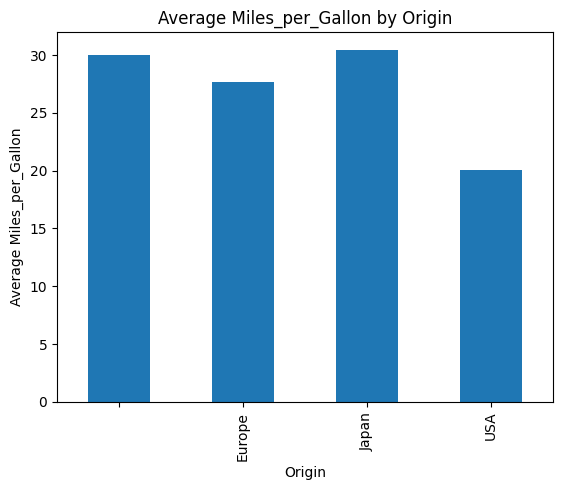

In [21]:
#  Create a bar chart showing the average `Miles_per_Gallon` for each `Origin`.
import matplotlib.pyplot as plt
df.groupby('Origin')['Miles_per_Gallon'].mean().plot(kind='bar')
plt.ylabel('Average Miles_per_Gallon')
plt.title('Average Miles_per_Gallon by Origin')
plt.show()


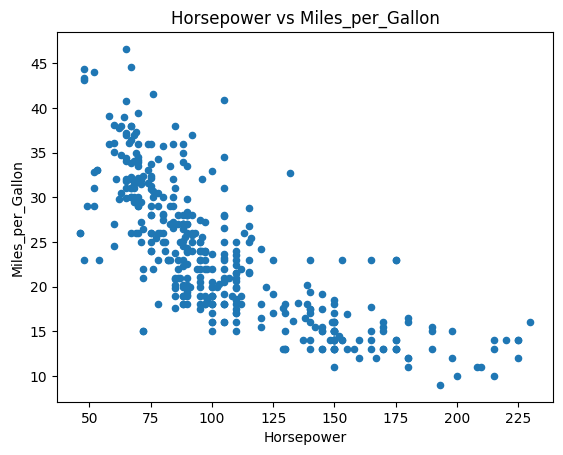

In [22]:
# Plot a scatter plot comparing `Horsepower` and `Miles_per_Gallon`
df.plot.scatter(x='Horsepower', y='Miles_per_Gallon')
plt.xlabel('Horsepower')
plt.ylabel('Miles_per_Gallon')
plt.title('Horsepower vs Miles_per_Gallon')
# Save the scatter plot as horsepower_vs_miles_per_gallon.jpeg in the result directory
plt.savefig('result/horsepower_vs_miles_per_gallon.jpeg')
plt.show()

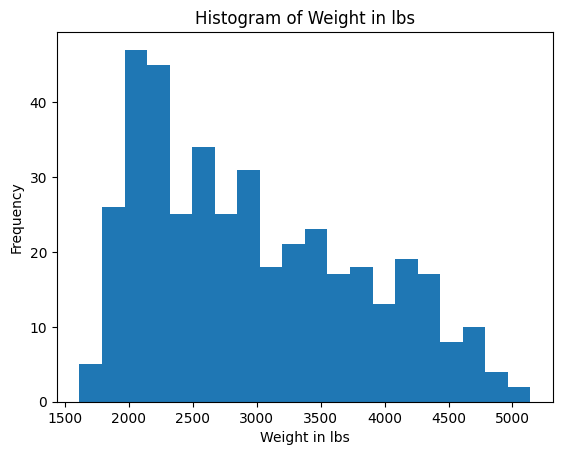

In [23]:
# Generate a histogram for `Weight_in_lbs` to analyze the distribution.
df['Weight_in_lbs'].plot(kind='hist', bins=20)
plt.xlabel('Weight in lbs')
plt.ylabel('Frequency')
plt.title('Histogram of Weight in lbs')
plt.savefig('result/Weight_in_lbs_histogram.png')
plt.show()

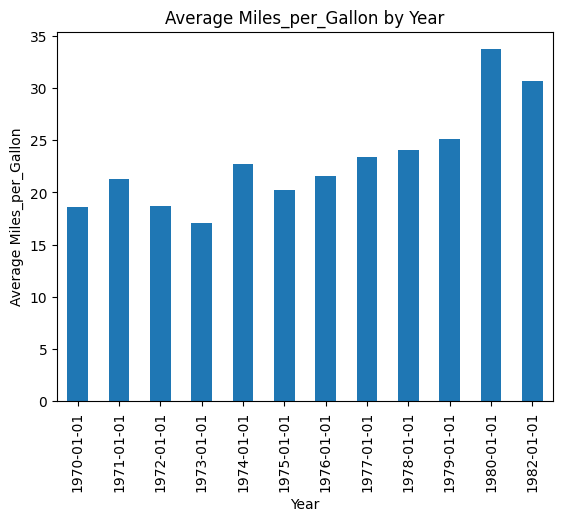

In [24]:
# Perform a cohort analysis: Group cars by `Year` and calculate the average `Miles_per_Gallon` per year.
df.groupby('Year')['Miles_per_Gallon'].mean().plot(kind='bar')
plt.ylabel('Average Miles_per_Gallon')
plt.title('Average Miles_per_Gallon by Year')   
plt.show()


In [25]:
# Write a function to filter cars with `Power-to-Weight Ratio` above a threshold
def filter_cars(df, threshold):
    return df[df['Power-to-Weight Ratio'] > threshold]

# Display max value of `Power-to-Weight Ratio`
print(df['Power-to-Weight Ratio'].max())

# Display min value of `Power-to-Weight Ratio`
print(df['Power-to-Weight Ratio'].min())

# Display cars with `Power-to-Weight Ratio` above 0.03
print(filter_cars(df, 0.06))



0.0729099157485418
0.020556745182012847
                       Name  Miles_per_Gallon  Cylinders  Displacement  \
19  buick estate wagon (sw)              14.0          8         455.0   

    Horsepower  Weight_in_lbs  Acceleration        Year Origin  \
19       225.0           3086          10.0  1970-01-01    USA   

    Power-to-Weight Ratio  
19                0.07291  


In [26]:
# Pivot the data to create a pivot table with `Year` as the index and `Origin` as the columns, and `Miles_per_Gallon` as the values.
pivot_table = df.pivot_table(index='Year', columns='Origin', values='Miles_per_Gallon', aggfunc='mean')
# in the pivot table, replace NaN values with 0
pivot_table.fillna(0, inplace=True)
print(pivot_table)


Origin               Europe      Japan        USA
Year                                             
1970-01-01   0.0  24.833333  25.500000  16.703704
1971-01-01   0.0  27.600000  29.500000  18.100000
1972-01-01   0.0  22.000000  24.200000  16.277778
1973-01-01   0.0  24.000000  20.000000  15.034483
1974-01-01   0.0  27.000000  29.333333  18.333333
1975-01-01   0.0  24.500000  27.500000  17.550000
1976-01-01   0.0  24.250000  28.000000  19.431818
1977-01-01   0.0  29.250000  27.416667  20.722222
1978-01-01   0.0  24.950000  29.687500  21.772727
1979-01-01   0.0  30.450000  32.950000  23.478261
1980-01-01   0.0  37.288889  35.400000  25.914286
1982-01-01  30.0  32.757143  33.785714  28.269697


In [27]:

# Aggregate the data with median to create a pivot table with `Year` as the index and `Origin` as the columns, and `Miles_per_Gallon` as the values.
pivot_table_median = df.pivot_table(index='Year', columns='Origin', values='Miles_per_Gallon', aggfunc='median')
# Why pivot table is having NaN values?
# The NaN values in the pivot table are due to missing values in the original dataset.
# in the pivot table median, replace NaN values with 0
pivot_table_median.fillna(0, inplace=True)
print(pivot_table_median)



Origin            Europe  Japan    USA
Year                                  
1970-01-01   0.0   25.00  25.50  15.00
1971-01-01   0.0   28.00  29.00  18.00
1972-01-01   0.0   22.00  24.00  14.00
1973-01-01   0.0   24.00  20.00  14.00
1974-01-01   0.0   26.00  31.00  16.00
1975-01-01   0.0   24.00  26.50  17.50
1976-01-01   0.0   26.00  30.00  18.25
1977-01-01   0.0   29.75  28.00  18.00
1978-01-01   0.0   20.95  28.50  20.20
1979-01-01   0.0   29.55  32.95  21.50
1980-01-01   0.0   36.40  33.80  26.40
1982-01-01  30.0   33.00  34.00  27.00


In [28]:
# create a function that identifies outliers in the dataset based on `Miles_per_Gallon` using the IQR method.
def find_outliers_iqr(df):
    Q1 = df['Miles_per_Gallon'].quantile(0.25)
    Q3 = df['Miles_per_Gallon'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['Miles_per_Gallon'] < lower_bound) | (df['Miles_per_Gallon'] > upper_bound)]

# Display outliers in the dataset
print(find_outliers_iqr(df))

          Name  Miles_per_Gallon  Cylinders  Displacement  Horsepower  \
329  mazda glc              46.6          4          86.0        65.0   

     Weight_in_lbs  Acceleration        Year Origin  Power-to-Weight Ratio  
329           2110          17.9  1980-01-01  Japan               0.030806  


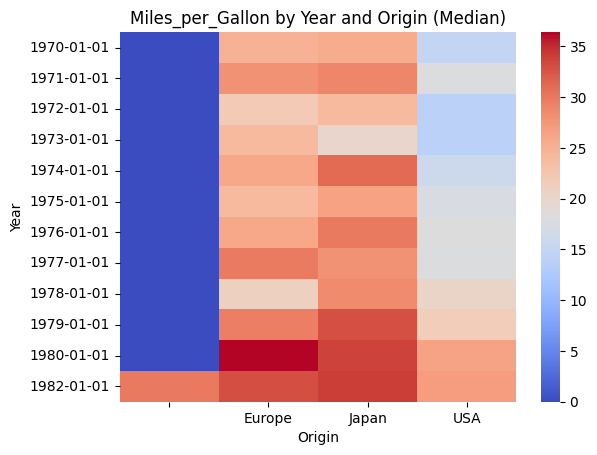

In [29]:
# Plot the pivot table with median values as a heatmap
import seaborn as sns
sns.heatmap(pivot_table_median, cmap='coolwarm')
plt.title('Miles_per_Gallon by Year and Origin (Median)')
plt.show()